## E-Commerce Data Model

In [1]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore');

In [2]:
df= pd.read_csv('E Commerce Dataset.csv')

In [3]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [6]:
df.shape

(5630, 20)

## Data Cleaning

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5630, 20)

In [9]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

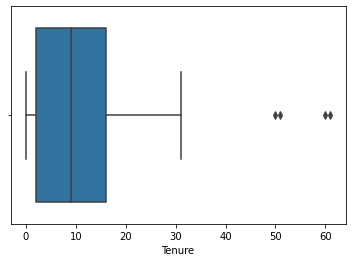

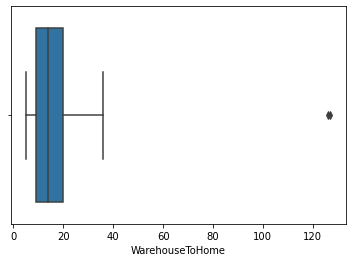

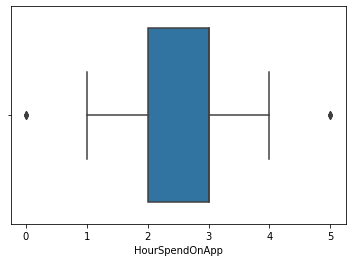

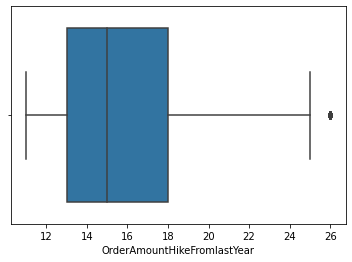

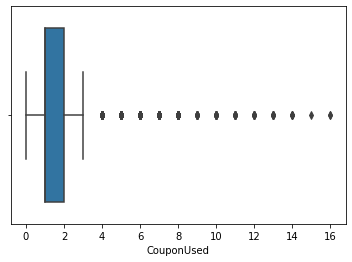

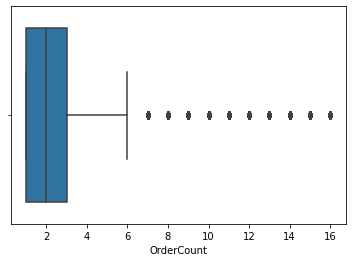

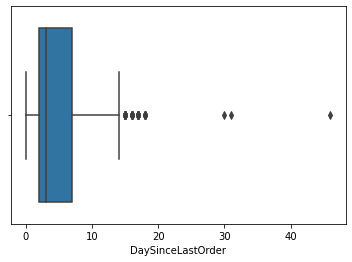

In [10]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='float64'):
        plt.figure();
        sns.boxplot(df[col])

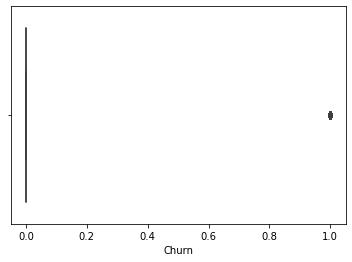

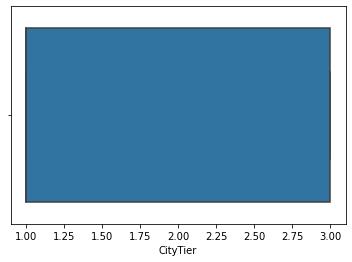

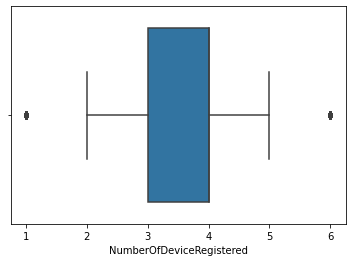

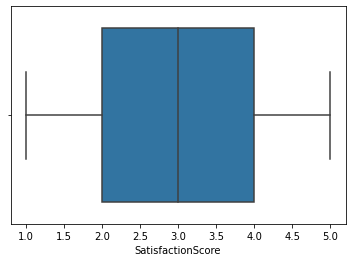

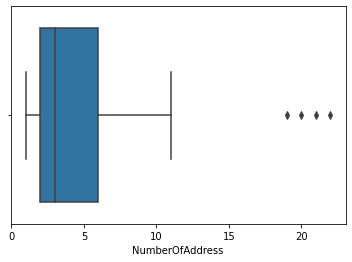

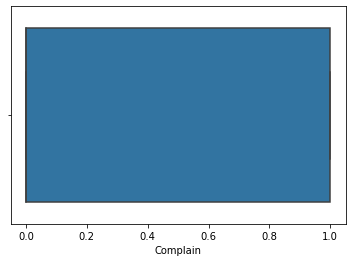

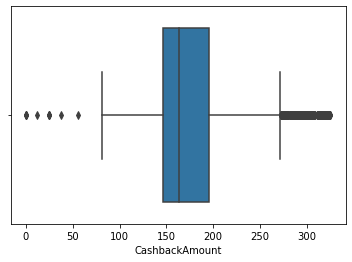

In [11]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='int64'):
        plt.figure();
        sns.boxplot(df[col])

In [12]:
tenure_median=df['Tenure'].median();
df['Tenure'].fillna(tenure_median,inplace=True);

warehouse_median=df['WarehouseToHome'].median();
df['WarehouseToHome'].fillna(warehouse_median,inplace=True);

orderAmount_median=df['OrderAmountHikeFromlastYear'].median();
df['OrderAmountHikeFromlastYear'].fillna(orderAmount_median,inplace=True);

coupon_median=df['CouponUsed'].median();
df['CouponUsed'].fillna(coupon_median,inplace=True);

ordercount_median=df['OrderCount'].median();
df['OrderCount'].fillna(ordercount_median,inplace=True);

days_median=df['DaySinceLastOrder'].median();
df['DaySinceLastOrder'].fillna(days_median,inplace=True);

address_median=df['NumberOfAddress'].median();
df['NumberOfAddress'].fillna(address_median,inplace=True);

cash_median=df['CashbackAmount'].median();
df['CashbackAmount'].fillna(cash_median,inplace=True);



hours_mean=df['HourSpendOnApp'].mean();
df['HourSpendOnApp'].fillna(hours_mean,inplace=True);


numDevice_mean=df['NumberOfDeviceRegistered'].mean();
df['NumberOfDeviceRegistered'].fillna(numDevice_mean,inplace=True);


In [13]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [14]:
df['Churn'].fillna('NA',inplace=True);
df['Complain'].fillna('NA',inplace=True);

In [15]:
#elimininating Extreme Values
def remove_Outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;

In [16]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='float64'):
        remove_Outliers(col);

In [17]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='int64'):
        remove_Outliers(col);

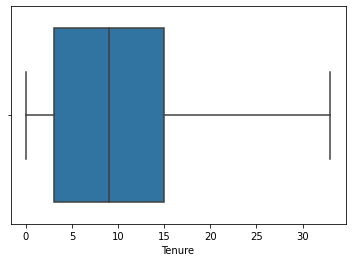

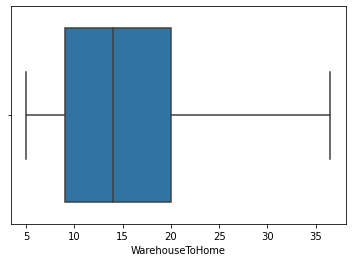

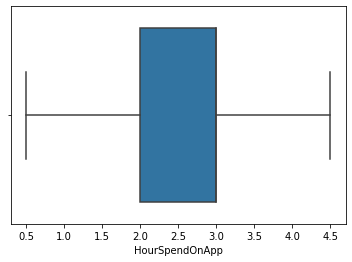

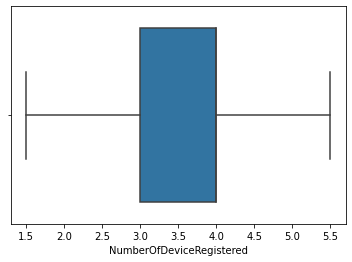

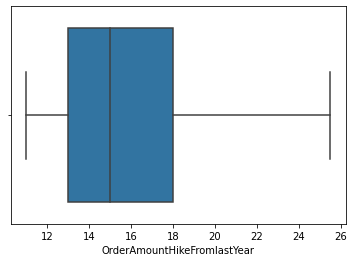

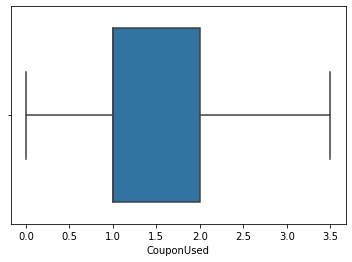

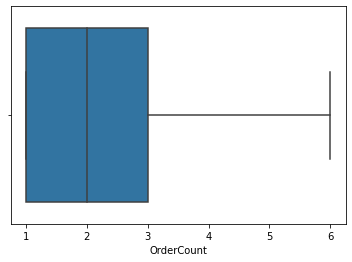

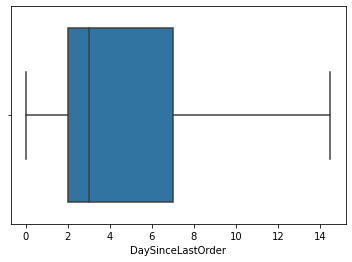

In [18]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='float64'):
        plt.figure();
        sns.boxplot(df[col])

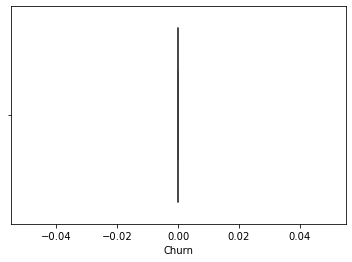

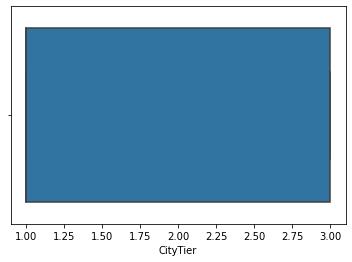

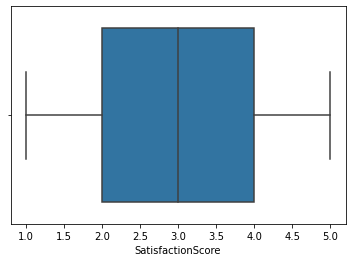

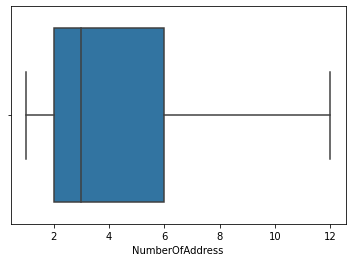

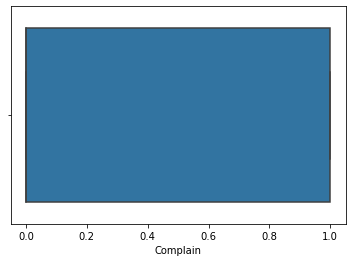

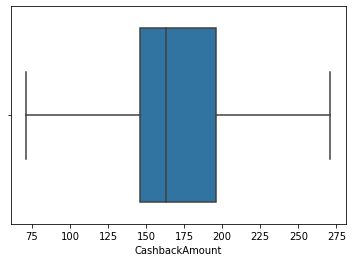

In [19]:
for col in df.columns:
    if(col != 'CustomerID'and df[col].dtypes=='int64'):
        plt.figure();
        sns.boxplot(df[col])

## Converting categorical values to numerical

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();
df_new = df.copy();

for col in df_new.columns:
    if(col != 'CustomersID'):
        df_new[col] = encoder.fit_transform(df_new[col]);

In [27]:
df_new

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,0,4,1,2,1,4,0,4,2,2,1,2,8,1,0,1,0,5,52
1,1,0,9,2,0,3,6,1,4,3,3,2,2,6,1,4,0,0,0,13
2,2,0,9,2,0,25,4,1,2,3,3,2,2,5,1,3,0,0,3,12
3,3,0,0,2,2,10,4,1,2,3,2,4,2,7,0,12,0,0,3,26
4,4,0,0,2,0,7,0,1,3,2,3,4,2,2,0,0,1,0,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,5625,0,10,0,0,25,3,1,4,1,2,0,1,5,0,7,1,1,4,43
5626,5626,0,13,1,0,8,3,1,4,4,0,4,1,5,0,5,1,1,3,117
5627,5627,0,1,1,0,6,4,1,4,1,2,3,1,2,1,10,1,1,4,78
5628,5628,0,23,0,2,4,3,1,5,4,2,3,1,3,0,4,2,1,9,71


In [28]:
from sklearn.preprocessing import MinMaxScaler;

scaler = MinMaxScaler();

for col in df_new.columns:
    if(col != 'CustomersID'):
        df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1,1));

In [29]:
df_new

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.000000,0.0,0.12500,0.5,1.0,0.03125,0.666667,0.0,0.666667,0.4,0.4,0.25,1.0,0.727273,1.0,0.000000,0.25,0.0,0.333333,0.320988
1,0.000178,0.0,0.28125,1.0,0.0,0.09375,1.000000,1.0,0.666667,0.6,0.6,0.50,1.0,0.545455,1.0,0.266667,0.00,0.0,0.000000,0.080247
2,0.000355,0.0,0.28125,1.0,0.0,0.78125,0.666667,1.0,0.333333,0.6,0.6,0.50,1.0,0.454545,1.0,0.200000,0.00,0.0,0.200000,0.074074
3,0.000533,0.0,0.00000,1.0,1.0,0.31250,0.666667,1.0,0.333333,0.6,0.4,1.00,1.0,0.636364,0.0,0.800000,0.00,0.0,0.200000,0.160494
4,0.000711,0.0,0.00000,1.0,0.0,0.21875,0.000000,1.0,0.500000,0.4,0.6,1.00,1.0,0.181818,0.0,0.000000,0.25,0.0,0.200000,0.135802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.999289,0.0,0.31250,0.0,0.0,0.78125,0.500000,1.0,0.666667,0.2,0.4,0.00,0.5,0.454545,0.0,0.466667,0.25,0.2,0.266667,0.265432
5626,0.999467,0.0,0.40625,0.5,0.0,0.25000,0.500000,1.0,0.666667,0.8,0.0,1.00,0.5,0.454545,0.0,0.333333,0.25,0.2,0.200000,0.722222
5627,0.999645,0.0,0.03125,0.5,0.0,0.18750,0.666667,1.0,0.666667,0.2,0.4,0.75,0.5,0.181818,1.0,0.666667,0.25,0.2,0.266667,0.481481
5628,0.999822,0.0,0.71875,0.0,1.0,0.12500,0.500000,1.0,0.833333,0.8,0.4,0.75,0.5,0.272727,0.0,0.266667,0.50,0.2,0.600000,0.438272


## Correlation Analysis

<AxesSubplot:>

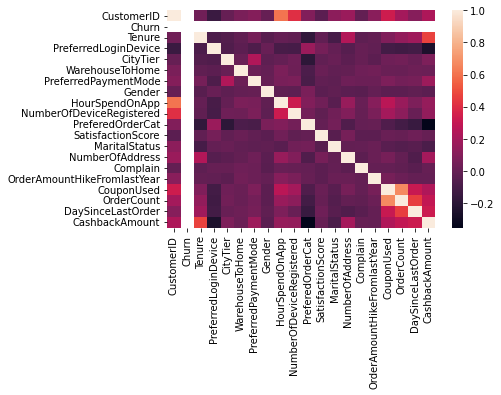

In [30]:
sns.heatmap(df_new.corr())

In [31]:
corr = df_new.corr();
corr_mask =corr.mask(np.triu(np.ones_like(corr, dtype = bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending=False);

In [32]:
corr_df=pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [33]:
corr_df

,,0


In [34]:
df_new.drop(['Churn'],axis=1,inplace=True)

<AxesSubplot:>

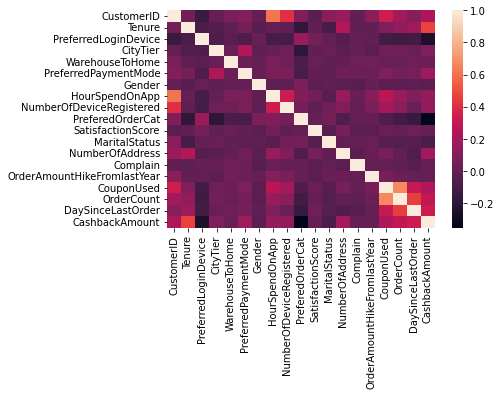

In [36]:
sns.heatmap(df_new.corr())